## Linear Regression with Python Scikit Learn

#### In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author : Abhishek Kumar Singh

In [1]:
# import all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

In [2]:
# Read data from remote link
# Importing the dataset
url = "http://bit.ly/w-data"
#Creating a dataframe to store the dataset
df = pd.read_csv(url)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Generating statistical insights from the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#View the datatype of each columns within the dataset
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
#check if there exists any missing/null values within the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Exploratory Data Analysis(EDA)

#### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

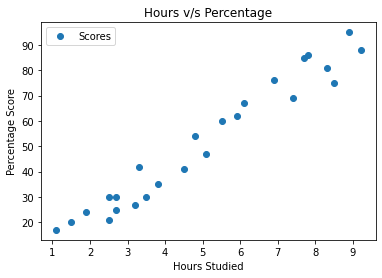

In [6]:
#Plotting the distribution of scores

df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score');

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

#### The next step is to divide the dataset based on the independent and dependent variables

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### test_size=0.2 signifies 80% of the dataset comes from Training set and 20% from the Testing set

## Training the Algorithm

#### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
#import linear regression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

#create an object of the given class
lm = LinearRegression()

#fit the train and test set within the model
lm.fit(X_train,y_train);

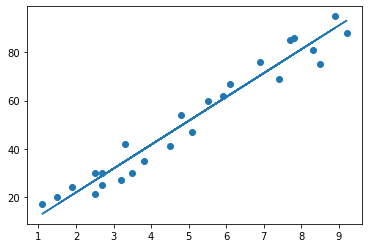

In [10]:
#Plotting the regression line
line = lm.coef_*X+lm.intercept_

#Plotting for test data (Scatter plot)
plt.scatter(X,y)
plt.plot(X,line);

## Making Predictions

In [11]:
y_pred = lm.predict(X_test)

In [12]:
#Comparing actual value v/s predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
print('MSE of predicted scores = ',mse)
print('RMSE = ',sqrt(mse))

MSE of predicted scores =  21.5987693072174
RMSE =  4.6474476121003665
